## Data Cleanup and Analysis 

In [44]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy
from path import Path
from config import db_URI

In [45]:
engine = create_engine(db_URI)

In [46]:
# Importing GDP from the database
gdp_df = pd.read_sql_query("select * from cleaned_gbp_csv", con=engine)
print(gdp_df.shape)
# gdp_df.head()

(50, 8)


In [47]:
# Drop uneccessary columns
gdp_df = gdp_df.drop(columns=['column1','description','gdp_2015'])

In [48]:
# Renaming the columns
gdp_df.rename(columns = {'state_name':'State', 
                              'gdp_2016':'2016','gdp_2017':'2017','gdp_2018':'2018','gdp_2019':'2019'}, inplace = True)
print(gdp_df.shape)

(50, 5)


In [49]:
# # Unpivot the df from wide to long format
gdp_df1 = pd.melt(gdp_df, id_vars=['State'], var_name='Year', value_name='GDP')
print(gdp_df1.shape)
gdp_df1.head()

(200, 3)


,State,Year,GDP
0,Alabama,2016,191523
1,Alaska,2016,53289
2,Arizona,2016,291259
3,Arkansas,2016,113490
4,California,2016,2519133


In [50]:
# Importing flu from the database
flu_df = pd.read_sql_query("select * from flu_percentages" , con=engine)
print(flu_df.shape)

(50, 5)


In [51]:
# Renaming the columns
flu_df.rename(columns = {'state':'State','2016_cases_percent':'2016','2017_cases_percent':'2017','2018_cases_percent':'2018','2019_cases_percent':'2019'}, inplace = True)

In [52]:
# Unpivot the df from wide to long format
flu_df1 = pd.melt(flu_df, id_vars=['State'], var_name='Year', value_name='Flu_%')
print(flu_df1.shape)
flu_df1.head()

(200, 3)


,State,Year,Flu_%
0,Alabama,2016,0.237399828
1,Alaska,2016,0.143366565
2,Arizona,2016,0.322226884
3,Arkansas,2016,0.096424049
4,California,2016,0.112745087


In [53]:
gdp_df1.head()

,State,Year,GDP
0,Alabama,2016,191523
1,Alaska,2016,53289
2,Arizona,2016,291259
3,Arkansas,2016,113490
4,California,2016,2519133


In [54]:
# Merging the gdp and flu % datasets
cleaned_df = pd.merge(gdp_df1, flu_df1, on=["State", "Year"])
# cleaned_df = cleaned_df.drop(columns=['Year_y','state'])
print(cleaned_df.shape)
cleaned_df.head()

(200, 4)


,State,Year,GDP,Flu_%
0,Alabama,2016,191523,0.237399828
1,Alaska,2016,53289,0.143366565
2,Arizona,2016,291259,0.322226884
3,Arkansas,2016,113490,0.096424049
4,California,2016,2519133,0.112745087


In [55]:
# Importing uninsured rates from the database
uninsured_df = pd.read_sql_query("select * from uninsured_rates_by_state" , con=engine)
uninsured_df = uninsured_df.drop(uninsured_df.index[8])
print(uninsured_df.shape)
uninsured_df.head()

(50, 5)


,﻿State,Uninsured Rate 2016,Uninsured Rate 2017,Uninsured Rate 2018,Uninsured Rate 2019
0,Alabama,9.1,9.4,10.0,9.7
1,Alaska,14.0,13.7,12.0,12.2
2,Arizona,10.0,10.1,10.0,11.3
3,Arkansas,7.9,7.9,8.0,9.1
4,California,7.3,7.2,7.0,7.7


In [56]:
# Removing white space from the df
uninsured_df.columns=uninsured_df.columns.str.replace(' ', '')
uninsured_df.columns=uninsured_df.columns.str.replace('﻿', '',regex=True)

In [57]:
# # Renaming the columns
uninsured_df.rename(columns = {'UninsuredRate2016':'2016','UninsuredRate2017':'2017','UninsuredRate2018':'2018','UninsuredRate2019':'2019'}, inplace = True)
uninsured_df.head()

,State,2016,2017,2018,2019
0,Alabama,9.1,9.4,10.0,9.7
1,Alaska,14.0,13.7,12.0,12.2
2,Arizona,10.0,10.1,10.0,11.3
3,Arkansas,7.9,7.9,8.0,9.1
4,California,7.3,7.2,7.0,7.7


In [58]:
# uninsured_df.columns=uninsured_df.columns.str.replace('﻿', '',regex=True)

In [59]:
# uninsured_df.head()

In [60]:
#Rename a pending column 'State'
# uninsured_df.rename(columns = {'State':'state'}, inplace=True)

In [61]:
# # Unpivot the df from wide to long format
uninsured_df1 = pd.melt(uninsured_df, id_vars=['State'], value_name='Uninsured_%', var_name='Year')
print(uninsured_df1.shape)
# uninsured_df1.head()

(200, 3)


In [62]:
# Importing population from the database
filepath = Path('Cleaned_population_density.csv')
pop_df = pd.read_csv(filepath)
pop_df = pop_df.drop(pop_df.index[8])
print(pop_df.shape)
pop_df.head()

(50, 5)


,State,2016,2017,2018,2019
0,.Alabama,"4,863,525","4,874,486","4,887,681","4,903,185"
1,.Alaska,"741,456","739,700","735,139","731,545"
2,.Arizona,"6,941,072","7,044,008","7,158,024","7,278,717"
3,.Arkansas,"2,989,918","3,001,345","3,009,733","3,017,804"
4,.California,"39,167,117","39,358,497","39,461,588","39,512,223"


In [63]:
# Replace regex and white space in the dataframes
pop_df.columns=pop_df.columns.str.replace(' ', '')
pop_df['State']=pop_df['State'].str.replace('.','')
pop_df.replace(',','', regex=True, inplace=True)

In [64]:
# # Convert the df string to float
# cols = pop_df.columns.drop('State')
# pop_df[cols] = pop_df[cols].astype('float')

In [65]:
# Unpivot the pop_df from wide to long format
pop_df1 = pd.melt(pop_df, id_vars=['State'], var_name='Year', value_name='total_pop')
print(pop_df1.shape)
pop_df1.head()

(200, 3)


,State,Year,total_pop
0,Alabama,2016,4863525
1,Alaska,2016,741456
2,Arizona,2016,6941072
3,Arkansas,2016,2989918
4,California,2016,39167117


In [67]:
pop_df1['total_pop'] = pop_df1['total_pop'].astype(float)

In [68]:
# Merging the uninsured_df and pop_df datasets
cleaned_df2 = pd.merge(pop_df1, uninsured_df1, on=["State", "Year"])
# Dropping duplicated index
# cleaned_df2 = cleaned_df2.drop(columns=['state','Year_y'])
print(cleaned_df2.shape)
cleaned_df2.head()

(200, 4)


,State,Year,total_pop,Uninsured_%
0,Alabama,2016,4863525.0,9.1
1,Alaska,2016,741456.0,14.0
2,Arizona,2016,6941072.0,10.0
3,Arkansas,2016,2989918.0,7.9
4,California,2016,39167117.0,7.3


In [69]:
# Importing PCI by state from the database
pci_df = pd.read_sql_query("select * from pci_by_state" , con=engine)
print(pci_df.shape)
pci_df.head()

(50, 5)


,State,2016,2017,2018,2019
0,Alabama,39536.0,41030.0,42710.0,44145.0
1,Alaska,56302.0,57394.0,60355.0,62806.0
2,Arizona,40801.0,42590.0,44597.0,46058.0
3,Arkansas,40385.0,41657.0,43325.0,44629.0
4,California,58048.0,60549.0,63720.0,66619.0


In [70]:
# Check for non null values
# pci_df.isnull().sum()

In [71]:
# Unpivot the pop_df from wide to long format
pci_df1 = pd.melt(pci_df, id_vars=['State'], var_name='Year', value_name='PC_Income')
print(pci_df1.shape)
# pci_df1.head()

(200, 3)


In [72]:
# Merging cleaned_df2 with pci_df datasets
cleaned_df3 = pd.merge(cleaned_df2, pci_df1, on=["State", "Year"])
# Dropping duplicated index
# cleaned_df3 = cleaned_df3.drop(columns=['Year'])
print(cleaned_df3.shape)
cleaned_df3.head()

(200, 5)


,State,Year,total_pop,Uninsured_%,PC_Income
0,Alabama,2016,4863525.0,9.1,39536.0
1,Alaska,2016,741456.0,14.0,56302.0
2,Arizona,2016,6941072.0,10.0,40801.0
3,Arkansas,2016,2989918.0,7.9,40385.0
4,California,2016,39167117.0,7.3,58048.0


In [73]:
# Merging cleaned_df3 with clean_df datasets
viral_df = pd.merge(cleaned_df3,cleaned_df, on=["State", "Year"])
# Dropping duplicated index
# viral_df = viral_df.drop(columns=['Year_x_y'])
# Renaming appropriate columns
# viral_df.rename(columns = {'Year_x_x':'Year','total_pop':'Total_Pop','Uninsured_%':'Uninsured_Pop_%','PC_Income':'P_C_Income','GDP':'GDP_State','Flu_%':'State_Flu_%'}, inplace = True)
print(viral_df.shape)
viral_df.head()

(200, 7)


,State,Year,total_pop,Uninsured_%,PC_Income,GDP,Flu_%
0,Alabama,2016,4863525.0,9.1,39536.0,191523,0.237399828
1,Alaska,2016,741456.0,14.0,56302.0,53289,0.143366565
2,Arizona,2016,6941072.0,10.0,40801.0,291259,0.322226884
3,Arkansas,2016,2989918.0,7.9,40385.0,113490,0.096424049
4,California,2016,39167117.0,7.3,58048.0,2519133,0.112745087


In [74]:
# Convert the df columns to float
viral_df['Flu_%'] = viral_df['Flu_%'].astype(float)
# viral_df.dtypes

In [76]:
# Convert the two columns to float [']
viral_df['Year'] = viral_df['Year'].astype(str)
# viral_df.dtypes

In [ ]:
# viral_df.dtypes

### Visualizing the merged data for any correlation

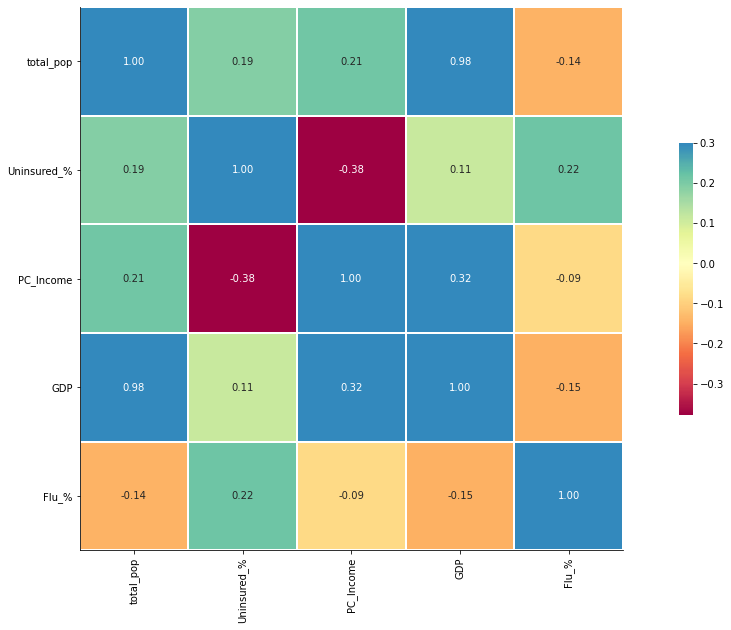

In [77]:
corr = viral_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(20,10)
    
plt.show()

In [ ]:
# Creating the correlation matrix
viral_df.corr()

In [79]:
# Saving the new cleaned dataset
viral_df.to_csv("viral_data.csv")